## Combining the datasets

### This code creates a combined dataset with 15 subwindows for each interaction

In [1]:
import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import numpy as np
import datetime

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_rows = 50

In [2]:
# set number of subwindows and slices
dat_num_subwindows = 15
dat_num_slices = 3


## Lili's data

### Load lili's data

In [3]:
# Load the processed quaternions data
lili_qua_path = "/Users/niharawarawita/Desktop/MSc Project/Data and code/Lili_Experiment/qua_combined_lili.csv"
lili_qua_df = pd.read_csv(lili_qua_path)
lili_qua_df.head()


,id,p_id,e_id,itr_id,itr_type,clt_id,rating,hand,w,x,y,z,AVx,AVy,AVz,AAx,AAy,AAz,AJx,AJy,AJz,timestamp
0,230904,1,5,119,3,16,4,0,0.086600,0.777745,0.093245,-0.615564,-0.151659,0.137463,-0.134024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-08-09 03:45:00.612
1,230905,1,5,119,3,16,4,1,0.303156,-0.720805,-0.211419,-0.586378,-0.146032,0.376636,0.329687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-08-09 03:45:00.635
2,230906,1,5,119,3,16,4,0,0.084969,0.778265,0.093829,-0.615045,0.133663,-0.087377,0.044941,3.242306,-2.554990,2.033689,36.844384,-29.033977,23.110105,2021-08-09 03:45:00.700
3,230907,1,5,119,3,16,4,1,0.302632,-0.719450,-0.210284,-0.588716,0.087317,-0.207186,-0.146515,3.381875,-8.461190,-6.901472,49.012688,-122.625945,-100.021327,2021-08-09 03:45:00.704
4,230908,1,5,119,3,16,4,1,0.302121,-0.718047,-0.209428,-0.590991,0.086724,-0.175910,-0.060999,-0.025794,1.359835,3.718058,-148.159536,427.001088,461.718694,2021-08-09 03:45:00.727


In [4]:
# Load the processed emg data
lili_emg_path = "/Users/niharawarawita/Desktop/MSc Project/Data and code/Lili_Experiment/emg_combined_lili.csv"
lili_emg_df = pd.read_csv(lili_emg_path)
lili_emg_df.head()

,new_id,id,p_id,e_id,itr_id,itr_type,hand,clt_id,ch_01,ch_02,ch_03,ch_04,ch_05,ch_06,ch_07,ch_08,timestamp,rating
0,59809,144033,1,5,119,3,0,16,0.736196,0.833333,0.592040,0.583732,0.500000,0.444444,0.491597,0.487705,2021-08-09 03:45:00.691,4
1,59810,144033,1,5,119,3,0,16,0.736196,0.826389,0.587065,0.555024,0.463115,0.555556,0.537815,0.495902,2021-08-09 03:45:00.691,4
2,59811,144033,1,5,119,3,0,16,0.736196,0.833333,0.592040,0.569378,0.459016,0.489712,0.462185,0.491803,2021-08-09 03:45:00.691,4
3,59812,144033,1,5,119,3,0,16,0.742331,0.840278,0.587065,0.521531,0.487705,0.497942,0.500000,0.487705,2021-08-09 03:45:00.691,4
4,59813,144033,1,5,119,3,0,16,0.748466,0.840278,0.601990,0.583732,0.528689,0.543210,0.504202,0.487705,2021-08-09 03:45:00.691,4


In [5]:
# Load the processed accellerometer data
lili_acc_path = "/Users/niharawarawita/Desktop/MSc Project/Data and code/Lili_Experiment/acc_combined_lili.csv"
lili_acc_df = pd.read_csv(lili_acc_path)
lili_acc_df.head()

,id,p_id,e_id,itr_id,itr_type,clt_id,rating,hand,Ax,Ay,Az,Vx,Vy,Vz,Jx,Jy,Jz,timestamp
0,230712,1,5,119,3,16,4,0,-0.809830,0.025375,-0.154770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-08-09 03:45:00.672
1,230714,1,5,119,3,16,4,0,-0.859146,0.027817,-0.223129,-0.001726,0.000085,-0.002393,-1.409040,0.069754,-1.953125,2021-08-09 03:45:00.707
2,230717,1,5,119,3,16,4,0,-0.884537,0.034653,-0.238266,-0.000939,0.000253,-0.000560,-0.686233,0.184755,-0.409101,2021-08-09 03:45:00.744
3,230719,1,5,119,3,16,4,0,-0.865494,0.044907,-0.222641,0.000343,0.000185,0.000281,1.057943,0.569661,0.868056,2021-08-09 03:45:00.762
4,230720,1,5,119,3,16,4,0,-0.869400,0.027817,-0.218246,-0.000074,-0.000325,0.000083,-0.205592,-0.899465,0.231291,2021-08-09 03:45:00.781


a = qua_df.groupby('p_id')['itr_id'].unique()
count = 0
lst = []
for i in range(0,9):
    count += len(a.iloc[i])
    lst.append(a.iloc[i])
count
lst

### Rename the required columns

In [6]:
lili_qua_df.rename(columns={'p_id': 'participant_id', 'itr_id': 'interaction_id',  'e_id': 'project_id',  'itr_type': 'property_id', 'clt_id': 'clothes_id'}, inplace=True)
lili_qua_df.head()

,id,participant_id,project_id,interaction_id,property_id,clothes_id,rating,hand,w,x,y,z,AVx,AVy,AVz,AAx,AAy,AAz,AJx,AJy,AJz,timestamp
0,230904,1,5,119,3,16,4,0,0.086600,0.777745,0.093245,-0.615564,-0.151659,0.137463,-0.134024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-08-09 03:45:00.612
1,230905,1,5,119,3,16,4,1,0.303156,-0.720805,-0.211419,-0.586378,-0.146032,0.376636,0.329687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-08-09 03:45:00.635
2,230906,1,5,119,3,16,4,0,0.084969,0.778265,0.093829,-0.615045,0.133663,-0.087377,0.044941,3.242306,-2.554990,2.033689,36.844384,-29.033977,23.110105,2021-08-09 03:45:00.700
3,230907,1,5,119,3,16,4,1,0.302632,-0.719450,-0.210284,-0.588716,0.087317,-0.207186,-0.146515,3.381875,-8.461190,-6.901472,49.012688,-122.625945,-100.021327,2021-08-09 03:45:00.704
4,230908,1,5,119,3,16,4,1,0.302121,-0.718047,-0.209428,-0.590991,0.086724,-0.175910,-0.060999,-0.025794,1.359835,3.718058,-148.159536,427.001088,461.718694,2021-08-09 03:45:00.727


In [7]:
lili_emg_df.rename(columns={'p_id': 'participant_id', 'itr_id': 'interaction_id',  'e_id': 'project_id',  'itr_type': 'property_id', 'clt_id': 'clothes_id'}, inplace=True)
lili_emg_df.head()

,new_id,id,participant_id,project_id,interaction_id,property_id,hand,clothes_id,ch_01,ch_02,ch_03,ch_04,ch_05,ch_06,ch_07,ch_08,timestamp,rating
0,59809,144033,1,5,119,3,0,16,0.736196,0.833333,0.592040,0.583732,0.500000,0.444444,0.491597,0.487705,2021-08-09 03:45:00.691,4
1,59810,144033,1,5,119,3,0,16,0.736196,0.826389,0.587065,0.555024,0.463115,0.555556,0.537815,0.495902,2021-08-09 03:45:00.691,4
2,59811,144033,1,5,119,3,0,16,0.736196,0.833333,0.592040,0.569378,0.459016,0.489712,0.462185,0.491803,2021-08-09 03:45:00.691,4
3,59812,144033,1,5,119,3,0,16,0.742331,0.840278,0.587065,0.521531,0.487705,0.497942,0.500000,0.487705,2021-08-09 03:45:00.691,4
4,59813,144033,1,5,119,3,0,16,0.748466,0.840278,0.601990,0.583732,0.528689,0.543210,0.504202,0.487705,2021-08-09 03:45:00.691,4


In [8]:
lili_acc_df.rename(columns={'p_id': 'participant_id', 'itr_id': 'interaction_id',  'e_id': 'project_id',  'itr_type': 'property_id', 'clt_id': 'clothes_id'}, inplace=True)
lili_acc_df.head()

,id,participant_id,project_id,interaction_id,property_id,clothes_id,rating,hand,Ax,Ay,Az,Vx,Vy,Vz,Jx,Jy,Jz,timestamp
0,230712,1,5,119,3,16,4,0,-0.809830,0.025375,-0.154770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-08-09 03:45:00.672
1,230714,1,5,119,3,16,4,0,-0.859146,0.027817,-0.223129,-0.001726,0.000085,-0.002393,-1.409040,0.069754,-1.953125,2021-08-09 03:45:00.707
2,230717,1,5,119,3,16,4,0,-0.884537,0.034653,-0.238266,-0.000939,0.000253,-0.000560,-0.686233,0.184755,-0.409101,2021-08-09 03:45:00.744
3,230719,1,5,119,3,16,4,0,-0.865494,0.044907,-0.222641,0.000343,0.000185,0.000281,1.057943,0.569661,0.868056,2021-08-09 03:45:00.762
4,230720,1,5,119,3,16,4,0,-0.869400,0.027817,-0.218246,-0.000074,-0.000325,0.000083,-0.205592,-0.899465,0.231291,2021-08-09 03:45:00.781


### Check if the dfs contain NA values

In [9]:
lili_qua_df.isna().sum()

id                0
participant_id    0
project_id        0
interaction_id    0
property_id       0
clothes_id        0
rating            0
hand              0
w                 0
x                 0
y                 0
z                 0
AVx               0
AVy               0
AVz               0
AAx               0
AAy               0
AAz               0
AJx               0
AJy               0
AJz               0
timestamp         0
dtype: int64

In [10]:
lili_emg_df.isna().sum()

new_id            0
id                0
participant_id    0
project_id        0
interaction_id    0
property_id       0
hand              0
clothes_id        0
ch_01             0
ch_02             0
ch_03             0
ch_04             0
ch_05             0
ch_06             0
ch_07             0
ch_08             0
timestamp         0
rating            0
dtype: int64

In [11]:
lili_acc_df.isna().sum()

id                0
participant_id    0
project_id        0
interaction_id    0
property_id       0
clothes_id        0
rating            0
hand              0
Ax                0
Ay                0
Az                0
Vx                0
Vy                0
Vz                0
Jx                0
Jy                0
Jz                0
timestamp         0
dtype: int64

### Drop the required columns

In [12]:
lili_qua_df.drop(['id'], axis=1, inplace=True)
lili_qua_df.head()

,participant_id,project_id,interaction_id,property_id,clothes_id,rating,hand,w,x,y,z,AVx,AVy,AVz,AAx,AAy,AAz,AJx,AJy,AJz,timestamp
0,1,5,119,3,16,4,0,0.086600,0.777745,0.093245,-0.615564,-0.151659,0.137463,-0.134024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-08-09 03:45:00.612
1,1,5,119,3,16,4,1,0.303156,-0.720805,-0.211419,-0.586378,-0.146032,0.376636,0.329687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-08-09 03:45:00.635
2,1,5,119,3,16,4,0,0.084969,0.778265,0.093829,-0.615045,0.133663,-0.087377,0.044941,3.242306,-2.554990,2.033689,36.844384,-29.033977,23.110105,2021-08-09 03:45:00.700
3,1,5,119,3,16,4,1,0.302632,-0.719450,-0.210284,-0.588716,0.087317,-0.207186,-0.146515,3.381875,-8.461190,-6.901472,49.012688,-122.625945,-100.021327,2021-08-09 03:45:00.704
4,1,5,119,3,16,4,1,0.302121,-0.718047,-0.209428,-0.590991,0.086724,-0.175910,-0.060999,-0.025794,1.359835,3.718058,-148.159536,427.001088,461.718694,2021-08-09 03:45:00.727


In [13]:
lili_emg_df.drop(['new_id', 'id'], axis=1, inplace=True)
lili_emg_df.head()

,participant_id,project_id,interaction_id,property_id,hand,clothes_id,ch_01,ch_02,ch_03,ch_04,ch_05,ch_06,ch_07,ch_08,timestamp,rating
0,1,5,119,3,0,16,0.736196,0.833333,0.592040,0.583732,0.500000,0.444444,0.491597,0.487705,2021-08-09 03:45:00.691,4
1,1,5,119,3,0,16,0.736196,0.826389,0.587065,0.555024,0.463115,0.555556,0.537815,0.495902,2021-08-09 03:45:00.691,4
2,1,5,119,3,0,16,0.736196,0.833333,0.592040,0.569378,0.459016,0.489712,0.462185,0.491803,2021-08-09 03:45:00.691,4
3,1,5,119,3,0,16,0.742331,0.840278,0.587065,0.521531,0.487705,0.497942,0.500000,0.487705,2021-08-09 03:45:00.691,4
4,1,5,119,3,0,16,0.748466,0.840278,0.601990,0.583732,0.528689,0.543210,0.504202,0.487705,2021-08-09 03:45:00.691,4


In [14]:
lili_acc_df.drop(['id'], axis=1, inplace=True)
lili_acc_df.head()

,participant_id,project_id,interaction_id,property_id,clothes_id,rating,hand,Ax,Ay,Az,Vx,Vy,Vz,Jx,Jy,Jz,timestamp
0,1,5,119,3,16,4,0,-0.809830,0.025375,-0.154770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-08-09 03:45:00.672
1,1,5,119,3,16,4,0,-0.859146,0.027817,-0.223129,-0.001726,0.000085,-0.002393,-1.409040,0.069754,-1.953125,2021-08-09 03:45:00.707
2,1,5,119,3,16,4,0,-0.884537,0.034653,-0.238266,-0.000939,0.000253,-0.000560,-0.686233,0.184755,-0.409101,2021-08-09 03:45:00.744
3,1,5,119,3,16,4,0,-0.865494,0.044907,-0.222641,0.000343,0.000185,0.000281,1.057943,0.569661,0.868056,2021-08-09 03:45:00.762
4,1,5,119,3,16,4,0,-0.869400,0.027817,-0.218246,-0.000074,-0.000325,0.000083,-0.205592,-0.899465,0.231291,2021-08-09 03:45:00.781


### Create the 15 window dataset

#### Required functions

In [15]:
def interaction_time(df):
    # Create a column for the starting time of each interaction 
    df['interaction_start_time'] = df['timestamp'].groupby([df['participant_id'], df['property_id'], df['clothes_id']]).transform('min')
    # Create a column for the ending time of each interaction 
    df['interaction_end_time'] = df['timestamp'].groupby([df['participant_id'], df['property_id'], df['clothes_id']]).transform('max')
    
    df['interaction_duration'] = df['interaction_end_time'] - df['interaction_start_time']#.datetime.total_seconds()
    df['interaction_duration'] = df['interaction_duration'].dt.total_seconds()
    return df

# Remove the excess data
def get_specified_time(df, required_time_duration=15):
    df['time_to_interaction_end'] = df['interaction_end_time'] - df['timestamp']
    
    new_df = df[df.time_to_interaction_end <= datetime.timedelta(0,required_time_duration)]
     
    # Drop the interaction_start_time and interaction_end_time for the dfs
    new_df.drop(['interaction_start_time', 'interaction_end_time', 'interaction_duration', 'time_to_interaction_end'], axis=1, inplace=True)
    
    new_df = interaction_time(new_df)
    
    return new_df

def create_subwindows(df, col_index=6, num_subwindows=dat_num_subwindows):
    
    # Create a column with the subwindow numbers
    df.insert(col_index, 'sub_window_num', num_subwindows)
    
    # Create column for increment
    df['increment_sub_window'] = df['interaction_duration'] / num_subwindows
    df['increment_sub_window'] = pd.to_timedelta(df.increment_sub_window, unit='s')
 
    #df['timestamp']= pd.to_datetime(df['timestamp'])
    #df['interaction_start_time']= pd.to_datetime(df['interaction_start_time'])
    #df['interaction_end_time']= pd.to_datetime(df['interaction_end_time'])
    
    for num in range(num_subwindows-1,0,-1):
        df.sub_window_num[df['timestamp'] <= df['interaction_start_time'] + num * df['increment_sub_window']] = num #+ datetime.timedelta(0,num)] 
        
   # Create a column for the starting time of each subwindow 
    df['subwindow_start_time'] = df['timestamp'].groupby([df['participant_id'], df['property_id'], df['clothes_id'], df['sub_window_num']]).transform('min')
    
    # Create a column for the ending time of each interaction 
    df['subwindow_end_time'] = df['timestamp'].groupby([df['participant_id'], df['property_id'], df['clothes_id'], df['sub_window_num']]).transform('max')
    
    # Create a column for the duration of the window
    df['subwindow_duration'] = df['subwindow_end_time'] - df['subwindow_start_time'] 
    df['subwindow_duration'] = df['subwindow_duration'].dt.total_seconds()

    return df
    
def create_slices(df, col_index=7, num_slices=dat_num_slices):
    
    # Create a column with the subwindow numbers
    df.insert(col_index, 'slice_num', num_slices)
    
    # Create column for increment
    df['increment_slice'] = df['subwindow_duration'] / num_slices
    df['increment_slice'] = pd.to_timedelta(df.increment_slice, unit='s')
     
    for num in range(num_slices-1,0,-1):
        df.slice_num[df['timestamp'] <= df['subwindow_start_time'] + num * df['increment_slice']] = num #+ datetime.timedelta(0,num)] 
        
   # Create a column for the starting time of each subwindow 
    df['slice_start_time'] = df['timestamp'].groupby([df['participant_id'], df['property_id'], df['clothes_id'], df['sub_window_num'], df['slice_num']]).transform('min')
    
    # Create a column for the ending time of each interaction 
    df['slice_end_time'] = df['timestamp'].groupby([df['participant_id'], df['property_id'], df['clothes_id'], df['sub_window_num'], df['slice_num']]).transform('max')
    
    # Create a column for the duration of the window
    df['slice_duration'] = df['slice_end_time'] - df['slice_start_time'] 
    df['slice_duration'] = df['slice_duration'].dt.total_seconds()

    return df

def calc_stats(df, data_type='qua', hand='Hand0', stat='max'):
    new_col_names_lst = []
    if data_type=='qua':
        column_names = ['w','x','y','z','AVx','AVy','AVz','AAx','AAy','AAz','AJx','AJy','AJz']    
    elif data_type=='emg':
        column_names = ['ch_01','ch_02','ch_03','ch_04','ch_05','ch_06','ch_07','ch_08']
    elif data_type=='acc':
        column_names = ['Ax','Ay','Az','Vx','Vy','Vz','Jx','Jy','Jz']       
    for col in column_names:
        if data_type=='emg':
            new_col_name = stat+'_'+col[:2]+col[4:]#+'_'+hand
        else:
            new_col_name = stat+'_'+col#+'_'+hand
        new_col_names_lst.append(new_col_name)        
        df[new_col_name] = df[col].groupby([df['participant_id'], df['property_id'], df['clothes_id'], df['sub_window_num'], df['slice_num']]).transform(stat)
    return df, new_col_names_lst

def calc_all_stats(df, data_type='qua', hand='Hand0'):
    cols_lst = []
    stat_list = ['max', 'mean', 'std']
    for stat in stat_list:
        df, added_cols = calc_stats(df, data_type=data_type, hand='Hand0', stat=stat)
        cols_lst = cols_lst + added_cols
    return df, cols_lst
        
    
def add_property_names_column_lili_data(df):
    df.insert(3, 'property_name', 'smoothness')
    df.property_name[df['property_id'] == 4] = 'thickness'
    df.property_name[df['property_id'] == 5] = 'warmth'
    df.property_name[df['property_id'] == 6] = 'flexibility'
    df.property_name[df['property_id'] == 7] = 'softness'
    df.property_name[df['property_id'] == 8] = 'enjoyment'
    return df


def add_property_names_column_2022_data(df):
    df.insert(3, 'property_name', 'smoothness')
    df.property_name[df['property_id'] == 13] = 'thickness'
    df.property_name[df['property_id'] == 14] = 'warmth'
    df.property_name[df['property_id'] == 15] = 'flexibility'
    df.property_name[df['property_id'] == 16] = 'softness'
    df.property_name[df['property_id'] == 17] = 'enjoyment'
    return df


def combine_classes_rating(df):
    df.insert(6, 'rating_level', 'medium')
    df.loc[df['rating'] > 5,'rating_level'] = 'high'
    df.loc[df['rating'] < 3,'rating_level'] = 'low'
    return df


def represent_rating_level_numerically(df):
    df.insert(7, 'rating_level_num', 1)
    df.loc[df['rating_level'] == 'medium','rating_level_num'] = 2
    df.loc[df['rating_level'] == 'high','rating_level_num'] = 3
    return df


#def insert_new_interaction_id_lili_data(df):
#    df.insert(5, "new_interaction_id", None)
 #   df['new_interaction_id'] = df.groupby(['participant_id', 'clothes_id', 'property_id'], sort=False).ngroup() + 1
  #  df.drop(['interaction_id'], axis=1, inplace=True)
   # df.rename(columns={'new_interaction_id': 'interaction_id'}, inplace=True)
    #return df


#def insert_new_interaction_id_2022_data(df):
 #   df.insert(5, "new_interaction_id", None)
  #  df['new_interaction_id'] = df.groupby(['participant_id', 'clothes_id', 'property_id'], sort=False).ngroup() + 1
   # df['new_interaction_id'] = df['new_interaction_id'] + 300
   # df.drop(['interaction_id'], axis=1, inplace=True)
   # df.rename(columns={'new_interaction_id': 'interaction_id'}, inplace=True)
   # return df


def renumber_socks(df):
    df.clothes_id[(df['clothes_id'] == 25) | (df['clothes_id'] == 31) | (df['clothes_id'] == 38) | (df['clothes_id'] == 44) | (df['clothes_id'] == 50) | (df['clothes_id'] == 56)] = 1
    df.clothes_id[(df['clothes_id'] == 26) | (df['clothes_id'] == 32) | (df['clothes_id'] == 39) | (df['clothes_id'] == 45) | (df['clothes_id'] == 51) | (df['clothes_id'] == 57)] = 2
    df.clothes_id[(df['clothes_id'] == 27) | (df['clothes_id'] == 33) | (df['clothes_id'] == 40) | (df['clothes_id'] == 46) | (df['clothes_id'] == 52) | (df['clothes_id'] == 58)] = 3
    df.clothes_id[(df['clothes_id'] == 28) | (df['clothes_id'] == 34) | (df['clothes_id'] == 41) | (df['clothes_id'] == 47) | (df['clothes_id'] == 53) | (df['clothes_id'] == 59)] = 4
    df.clothes_id[(df['clothes_id'] == 29) | (df['clothes_id'] == 35) | (df['clothes_id'] == 42) | (df['clothes_id'] == 48) | (df['clothes_id'] == 54) | (df['clothes_id'] == 60)] = 5
    df.clothes_id[(df['clothes_id'] == 30) | (df['clothes_id'] == 36) | (df['clothes_id'] == 43) | (df['clothes_id'] == 49) | (df['clothes_id'] == 55) | (df['clothes_id'] == 61)] = 6
    return df





#### Create a function to create datasets

In [16]:
def create_data(df, dataset='lili', data_type='emg', num_subwindows=dat_num_subwindows, num_slices=dat_num_slices):
    
    # Convert the timestamp to the datetime format
    df['timestamp']= pd.to_datetime(df['timestamp'])
    
    # Sort the values in each df by ascending value of the timestamp
    df.sort_values(by=['timestamp'], inplace=True)
    
    # Split the data into hands 0 (left) and 1 (right)
    df_0 = df[df.hand == 0]
    df_1 = df[df.hand == 1]
    
    # Reset indexes
    df_0.reset_index(inplace=True, drop=True)
    df_1.reset_index(inplace=True, drop=True)

    # Create columns for the starting, ending and duration time of the interaction
    df_0 = interaction_time(df_0)
    df_1 = interaction_time(df_1)
    
    # Obtain the last 15s of data
    df_0 = get_specified_time(df_0)
    df_1 = get_specified_time(df_1)
    
    # Remove data missing from hand 0 from hand 1
    #if dataset == 'lili':
       # df_1 = df_1.drop(df_1[(df_1.participant_id==5) & (df_1.clothes_id==12) & (df_1.property_id==8)].index)
       # df_1 = df_1.drop(df_1[(df_1.participant_id==8) & (df_1.clothes_id==13) & (df_1.property_id==3)].index)

    # Create subwindows
    df_0 = create_subwindows(df_0, col_index=6, num_subwindows=num_subwindows)
    df_1 = create_subwindows(df_1, col_index=6, num_subwindows=num_subwindows)
       
    # Create slices
    df_0 = create_slices(df_0, col_index=7, num_slices=num_slices)
    df_1 = create_slices(df_1, col_index=7, num_slices=num_slices)
    
    cols = ['participant_id', 'clothes_id', 'property_id', 'interaction_id', 'rating', 'sub_window_num', 'slice_num']#, 'slice_start_time', 'slice_end_time'
    cols_without_rating = ['participant_id', 'clothes_id', 'property_id', 'interaction_id', 'sub_window_num', 'slice_num']#, 'slice_start_time', 'slice_end_time'
    
    # Calculate stats - max, mean and std
    df_0_stats, new_cols_0 = calc_all_stats(df_0, data_type=data_type, hand='Hand0')
    df_1_stats, new_cols_1 = calc_all_stats(df_1, data_type=data_type, hand='Hand1')
    
    # Create df with stats
    if data_type == 'qua' and dataset == '2022':
        cols_0 = cols_without_rating + new_cols_0
        cols_1 = cols_without_rating + new_cols_1
    else:
        cols_0 = cols + new_cols_0
        cols_1 = cols + new_cols_1
    
    df_0_stats_new = df_0_stats.loc[:, cols_0]
    df_1_stats_new = df_1_stats.loc[:, cols_1]
    
    # Remove duplicate rows from the dfs - keep only the first row
    df_0_stats_new.drop_duplicates(keep='first', inplace=True)
    df_1_stats_new.drop_duplicates(keep='first', inplace=True)

    # Reset the indexes
    df_0_stats_new.reset_index(drop=True, inplace=True) 
    df_1_stats_new.reset_index(drop=True, inplace=True) 
    
    # Add property names
    if dataset == 'lili':
        #print(a)
        df_0_stats_new = add_property_names_column_lili_data(df_0_stats_new)
        df_1_stats_new = add_property_names_column_lili_data(df_1_stats_new)
    elif dataset == '2022':
        df_0_stats_new = add_property_names_column_2022_data(df_0_stats_new)
        df_1_stats_new = add_property_names_column_2022_data(df_1_stats_new)

    # Combine the classes for rating 
    if data_type != 'qua' or dataset != '2022':
        #print('a')
        df_0_stats_new = combine_classes_rating(df_0_stats_new)
        df_1_stats_new = combine_classes_rating(df_1_stats_new)

        # Represent the rating levels numerically
        df_0_stats_new = represent_rating_level_numerically(df_0_stats_new)
        df_1_stats_new = represent_rating_level_numerically(df_1_stats_new)
    
    if dataset == '2022':
        df_0_stats_new = renumber_socks(df_0_stats_new)
        df_1_stats_new = renumber_socks(df_1_stats_new)


    return df_0_stats_new, df_1_stats_new
    
   

In [17]:
#a, b = create_data(df=lili_emg_df, dataset='lili', data_type='emg', num_subwindows=dat_num_subwindows, num_slices=dat_num_slices)

a.groupby(['participant_id', 'clothes_id', 'property_id', 'sub_window_num'])['timestamp'].nunique().mean()

a.groupby(['participant_id', 'clothes_id', 'property_id', 'sub_window_num'])['project_id'].value_counts().mean()

    # Insert a new column for interaction id
    if dataset == 'lili':
        df_0_stats_new = insert_new_interaction_id_lili_data(df_0_stats_new)
        df_1_stats_new = insert_new_interaction_id_lili_data(df_1_stats_new)
    elif dataset == '2022':
        df_0_stats_new = insert_new_interaction_id_2022_data(df_0_stats_new)
        df_1_stats_new = insert_new_interaction_id_2022_data(df_1_stats_new)



#### Create datasets

In [18]:
lili_qua_0, lili_qua_1 = create_data(df=lili_qua_df, dataset='lili', data_type='qua', num_subwindows=dat_num_subwindows, num_slices=dat_num_slices)
lili_emg_0, lili_emg_1 = create_data(df=lili_emg_df, dataset='lili', data_type='emg', num_subwindows=dat_num_subwindows, num_slices=dat_num_slices)
lili_acc_0, lili_acc_1 = create_data(df=lili_acc_df, dataset='lili', data_type='acc', num_subwindows=dat_num_subwindows, num_slices=dat_num_slices)

In [19]:
print(f'lili_qua_0 shape = {lili_qua_0.shape}')
print(f'lili_qua_1 shape = {lili_qua_1.shape}')

print(f'lili_emg_0 shape = {lili_emg_0.shape}')
print(f'lili_emg_1 shape = {lili_emg_1.shape}')

print(f'lili_acc_0 shape = {lili_acc_0.shape}')
print(f'lili_acc_1 shape = {lili_acc_1.shape}')

lili_qua_0 shape = (42882, 49)
lili_qua_1 shape = (43195, 49)
lili_emg_0 shape = (42835, 34)
lili_emg_1 shape = (43182, 34)
lili_acc_0 shape = (42883, 37)
lili_acc_1 shape = (43193, 37)


#### Merge hands

In [20]:
def merge_data(df0, df1, dataset='lili', data_type = 'qua', with_rating='Yes'):
    if with_rating=='Yes':
        df_merged = pd.merge(df0, df1, how='outer', on=['participant_id', 'clothes_id', 'property_id', 'property_name', 'interaction_id', 'rating', 'rating_level', 'rating_level_num', 'sub_window_num', 'slice_num'],suffixes=('_hand0', '_hand1'))
    elif with_rating=='No':
        df_merged = pd.merge(df0, df1, how='outer', on=['participant_id', 'clothes_id', 'property_id', 'property_name', 'interaction_id', 'sub_window_num', 'slice_num'],suffixes=('_hand0', '_hand1'))
        
    print(f'{dataset} {data_type} merged shape: {df_merged.shape}')
    
    # Fill missing values with 0
    df_merged = df_merged.fillna(0)
    
    return df_merged    
    

In [21]:
lili_qua_merged = merge_data(lili_qua_0, lili_qua_1, 'lili', data_type = 'qua', with_rating='Yes')
lili_emg_merged = merge_data(lili_emg_0, lili_emg_1, 'lili', data_type = 'emg', with_rating='Yes')
lili_acc_merged = merge_data(lili_acc_0, lili_acc_1, 'lili', data_type = 'acc', with_rating='Yes')


lili qua merged shape: (43200, 88)
lili emg merged shape: (43199, 58)
lili acc merged shape: (43200, 64)


#### Merge the datasets

In [22]:
# Merge emg_merged and acc_merged
lili_emg_acc_merged = pd.merge(lili_emg_merged, lili_acc_merged, how='outer', on=['participant_id', 'clothes_id', 'property_id', 'property_name', 'interaction_id', 'rating', 'rating_level', 'rating_level_num', 'sub_window_num', 'slice_num'])

lili_complete_merged_data = pd.merge(lili_emg_acc_merged, lili_qua_merged, how='outer', on=['participant_id', 'clothes_id', 'property_id', 'property_name', 'interaction_id', 'rating', 'rating_level', 'rating_level_num', 'sub_window_num', 'slice_num'])
lili_complete_merged_data = lili_complete_merged_data.fillna(0)

lili_complete_merged_data.shape


(43200, 190)

## 2022 data

### Load the required data

In [23]:
# Load the processed quaternions data
dat_2022_qua_path = "/Users/niharawarawita/Desktop/MSc Project/Data and code/2022_Experiment/qua_combined_2022.csv"
dat_2022_qua_df = pd.read_csv(dat_2022_qua_path)
dat_2022_qua_df.head()


,id,p_id,itr_id,prj_id,ppt_id,clt_id,hand,w,x,y,z,AVx,AVy,AVz,AAx,AAy,AAz,AJx,AJy,AJz,timestamp
0,212444,19,119,622,16,27,1,0.897418,0.059799,-0.405298,0.163701,0.354371,-0.138088,-0.140597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.316
1,212445,19,119,622,16,27,0,0.050747,0.424152,-0.057506,0.902337,-0.477546,-0.222190,-4.942065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.326
2,212446,19,119,622,16,27,1,0.899481,0.057231,-0.400058,0.166167,-0.233459,0.107971,0.117765,-18.369691,7.689314,8.073829,-574.052834,240.291077,252.307168,2022-02-13 11:24:11.348
3,212447,19,119,622,16,27,0,0.091317,0.417244,-0.069474,0.901522,-0.386306,-0.333672,-1.060516,2.943233,-3.596196,125.211266,94.943007,-116.006335,4039.073106,2022-02-13 11:24:11.357
4,212448,19,119,622,16,27,1,0.900094,0.055599,-0.397422,0.169693,-0.152659,0.175423,0.231199,2.885740,2.409032,4.051195,759.122513,-188.581511,-143.665506,2022-02-13 11:24:11.376


In [24]:
# Load the processed emg data
dat_2022_emg_path = "/Users/niharawarawita/Desktop/MSc Project/Data and code/2022_Experiment/emg_combined_2022.csv"
dat_2022_emg_df = pd.read_csv(dat_2022_emg_path)
dat_2022_emg_df.head()

,new_id,id,p_id,itr_id,prj_id,ppt_id,rating,hand,clt_id,ch_01,ch_02,ch_03,ch_04,ch_05,ch_06,ch_07,ch_08,timestamp
0,1,132383,19,119,622,16,6,0,27,0.596059,0.497942,0.693642,0.521552,0.495902,0.657609,0.549550,0.713450,2022-02-13 11:24:11.302
1,2,132383,19,119,622,16,6,0,27,0.596059,0.502058,0.693642,0.517241,0.491803,0.652174,0.545045,0.701754,2022-02-13 11:24:11.302
2,3,132383,19,119,622,16,6,0,27,0.596059,0.497942,0.693642,0.517241,0.491803,0.646739,0.536036,0.695906,2022-02-13 11:24:11.302
3,4,132383,19,119,622,16,6,0,27,0.596059,0.497942,0.687861,0.517241,0.491803,0.646739,0.540540,0.690058,2022-02-13 11:24:11.302
4,5,132383,19,119,622,16,6,0,27,0.596059,0.497942,0.693642,0.517241,0.491803,0.646739,0.540540,0.701754,2022-02-13 11:24:11.302


In [25]:
# Load the processed accellerometer data
dat_2022_acc_path = "/Users/niharawarawita/Desktop/MSc Project/Data and code/2022_Experiment/acc_combined_2022.csv"
dat_2022_acc_df = pd.read_csv(dat_2022_acc_path)
dat_2022_acc_df.head()

,id,p_id,itr_id,prj_id,ppt_id,rating,hand,clt_id,Ax,Ay,Az,Vx,Vy,Vz,Jx,Jy,Jz,timestamp
0,212336,19,119,622,16,6,0,27,0.857437,0.001968,0.640823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.334
1,212338,19,119,622,16,6,0,27,0.740250,0.131363,0.659378,-0.003633,0.004011,0.000575,-3.780242,4.174017,0.598538,2022-02-13 11:24:11.365
2,212340,19,119,622,16,6,0,27,0.628922,0.065933,0.610062,-0.002561,-0.001505,-0.001134,-4.840353,-2.844769,-2.144192,2022-02-13 11:24:11.388
3,212342,19,119,622,16,6,0,27,0.545914,-0.040512,0.604202,-0.002407,-0.003087,-0.000170,-2.862338,-3.670528,-0.202047,2022-02-13 11:24:11.417
4,212344,19,119,622,16,6,0,27,0.794449,-0.037094,0.694046,0.012924,0.000178,0.004672,4.779522,0.065730,1.727764,2022-02-13 11:24:11.469


### Rename the required columns

In [26]:
dat_2022_qua_df.rename(columns={'p_id': 'participant_id', 'itr_id': 'interaction_id',  'prj_id': 'project_id',  'ppt_id': 'property_id', 'clt_id': 'clothes_id'}, inplace=True)
dat_2022_qua_df.head()

,id,participant_id,interaction_id,project_id,property_id,clothes_id,hand,w,x,y,z,AVx,AVy,AVz,AAx,AAy,AAz,AJx,AJy,AJz,timestamp
0,212444,19,119,622,16,27,1,0.897418,0.059799,-0.405298,0.163701,0.354371,-0.138088,-0.140597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.316
1,212445,19,119,622,16,27,0,0.050747,0.424152,-0.057506,0.902337,-0.477546,-0.222190,-4.942065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.326
2,212446,19,119,622,16,27,1,0.899481,0.057231,-0.400058,0.166167,-0.233459,0.107971,0.117765,-18.369691,7.689314,8.073829,-574.052834,240.291077,252.307168,2022-02-13 11:24:11.348
3,212447,19,119,622,16,27,0,0.091317,0.417244,-0.069474,0.901522,-0.386306,-0.333672,-1.060516,2.943233,-3.596196,125.211266,94.943007,-116.006335,4039.073106,2022-02-13 11:24:11.357
4,212448,19,119,622,16,27,1,0.900094,0.055599,-0.397422,0.169693,-0.152659,0.175423,0.231199,2.885740,2.409032,4.051195,759.122513,-188.581511,-143.665506,2022-02-13 11:24:11.376


In [27]:
dat_2022_emg_df.rename(columns={'p_id': 'participant_id', 'itr_id': 'interaction_id',  'prj_id': 'project_id',  'ppt_id': 'property_id', 'clt_id': 'clothes_id'}, inplace=True)
dat_2022_emg_df.head()

,new_id,id,participant_id,interaction_id,project_id,property_id,rating,hand,clothes_id,ch_01,ch_02,ch_03,ch_04,ch_05,ch_06,ch_07,ch_08,timestamp
0,1,132383,19,119,622,16,6,0,27,0.596059,0.497942,0.693642,0.521552,0.495902,0.657609,0.549550,0.713450,2022-02-13 11:24:11.302
1,2,132383,19,119,622,16,6,0,27,0.596059,0.502058,0.693642,0.517241,0.491803,0.652174,0.545045,0.701754,2022-02-13 11:24:11.302
2,3,132383,19,119,622,16,6,0,27,0.596059,0.497942,0.693642,0.517241,0.491803,0.646739,0.536036,0.695906,2022-02-13 11:24:11.302
3,4,132383,19,119,622,16,6,0,27,0.596059,0.497942,0.687861,0.517241,0.491803,0.646739,0.540540,0.690058,2022-02-13 11:24:11.302
4,5,132383,19,119,622,16,6,0,27,0.596059,0.497942,0.693642,0.517241,0.491803,0.646739,0.540540,0.701754,2022-02-13 11:24:11.302


In [28]:
dat_2022_acc_df.rename(columns={'p_id': 'participant_id', 'itr_id': 'interaction_id',  'prj_id': 'project_id',  'ppt_id': 'property_id', 'clt_id': 'clothes_id'}, inplace=True)
dat_2022_acc_df.head()

,id,participant_id,interaction_id,project_id,property_id,rating,hand,clothes_id,Ax,Ay,Az,Vx,Vy,Vz,Jx,Jy,Jz,timestamp
0,212336,19,119,622,16,6,0,27,0.857437,0.001968,0.640823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.334
1,212338,19,119,622,16,6,0,27,0.740250,0.131363,0.659378,-0.003633,0.004011,0.000575,-3.780242,4.174017,0.598538,2022-02-13 11:24:11.365
2,212340,19,119,622,16,6,0,27,0.628922,0.065933,0.610062,-0.002561,-0.001505,-0.001134,-4.840353,-2.844769,-2.144192,2022-02-13 11:24:11.388
3,212342,19,119,622,16,6,0,27,0.545914,-0.040512,0.604202,-0.002407,-0.003087,-0.000170,-2.862338,-3.670528,-0.202047,2022-02-13 11:24:11.417
4,212344,19,119,622,16,6,0,27,0.794449,-0.037094,0.694046,0.012924,0.000178,0.004672,4.779522,0.065730,1.727764,2022-02-13 11:24:11.469


### Create a rating column for qua_data

dat_2022_qua_df.head(2)

import time
t1 = time.time()
acc_rating = dat_2022_acc_df[['interaction_id', 'rating']]
#acc_rating
#a = pd.merge(dat_2022_qua_df, acc_rating, how='left', on=['interaction_id'])
a = dat_2022_qua_df.merge(acc_rating, how='left', on = 'interaction_id')

#x = df1.merge(df2, how='left', left_on='A', right_on='A2') 

t2 = time.time()

cgvhbkj

### Check if the dfs contain NA values

In [29]:
dat_2022_qua_df.isna().sum()

id                0
participant_id    0
interaction_id    0
project_id        0
property_id       0
clothes_id        0
hand              0
w                 0
x                 0
y                 0
z                 0
AVx               0
AVy               0
AVz               0
AAx               0
AAy               0
AAz               0
AJx               0
AJy               0
AJz               0
timestamp         0
dtype: int64

In [30]:
dat_2022_emg_df.isna().sum()

new_id            0
id                0
participant_id    0
interaction_id    0
project_id        0
property_id       0
rating            0
hand              0
clothes_id        0
ch_01             0
ch_02             0
ch_03             0
ch_04             0
ch_05             0
ch_06             0
ch_07             0
ch_08             0
timestamp         0
dtype: int64

In [31]:
dat_2022_acc_df.isna().sum()

id                0
participant_id    0
interaction_id    0
project_id        0
property_id       0
rating            0
hand              0
clothes_id        0
Ax                0
Ay                0
Az                0
Vx                0
Vy                0
Vz                0
Jx                0
Jy                0
Jz                0
timestamp         0
dtype: int64

### Drop the required columns

In [32]:
dat_2022_qua_df.drop(['id'], axis=1, inplace=True)
dat_2022_qua_df.head()

,participant_id,interaction_id,project_id,property_id,clothes_id,hand,w,x,y,z,AVx,AVy,AVz,AAx,AAy,AAz,AJx,AJy,AJz,timestamp
0,19,119,622,16,27,1,0.897418,0.059799,-0.405298,0.163701,0.354371,-0.138088,-0.140597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.316
1,19,119,622,16,27,0,0.050747,0.424152,-0.057506,0.902337,-0.477546,-0.222190,-4.942065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.326
2,19,119,622,16,27,1,0.899481,0.057231,-0.400058,0.166167,-0.233459,0.107971,0.117765,-18.369691,7.689314,8.073829,-574.052834,240.291077,252.307168,2022-02-13 11:24:11.348
3,19,119,622,16,27,0,0.091317,0.417244,-0.069474,0.901522,-0.386306,-0.333672,-1.060516,2.943233,-3.596196,125.211266,94.943007,-116.006335,4039.073106,2022-02-13 11:24:11.357
4,19,119,622,16,27,1,0.900094,0.055599,-0.397422,0.169693,-0.152659,0.175423,0.231199,2.885740,2.409032,4.051195,759.122513,-188.581511,-143.665506,2022-02-13 11:24:11.376


In [33]:
dat_2022_emg_df.drop(['new_id', 'id'], axis=1, inplace=True)
dat_2022_emg_df.head()

,participant_id,interaction_id,project_id,property_id,rating,hand,clothes_id,ch_01,ch_02,ch_03,ch_04,ch_05,ch_06,ch_07,ch_08,timestamp
0,19,119,622,16,6,0,27,0.596059,0.497942,0.693642,0.521552,0.495902,0.657609,0.549550,0.713450,2022-02-13 11:24:11.302
1,19,119,622,16,6,0,27,0.596059,0.502058,0.693642,0.517241,0.491803,0.652174,0.545045,0.701754,2022-02-13 11:24:11.302
2,19,119,622,16,6,0,27,0.596059,0.497942,0.693642,0.517241,0.491803,0.646739,0.536036,0.695906,2022-02-13 11:24:11.302
3,19,119,622,16,6,0,27,0.596059,0.497942,0.687861,0.517241,0.491803,0.646739,0.540540,0.690058,2022-02-13 11:24:11.302
4,19,119,622,16,6,0,27,0.596059,0.497942,0.693642,0.517241,0.491803,0.646739,0.540540,0.701754,2022-02-13 11:24:11.302


In [34]:
dat_2022_acc_df.drop(['id'], axis=1, inplace=True)
dat_2022_acc_df.head()

,participant_id,interaction_id,project_id,property_id,rating,hand,clothes_id,Ax,Ay,Az,Vx,Vy,Vz,Jx,Jy,Jz,timestamp
0,19,119,622,16,6,0,27,0.857437,0.001968,0.640823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-02-13 11:24:11.334
1,19,119,622,16,6,0,27,0.740250,0.131363,0.659378,-0.003633,0.004011,0.000575,-3.780242,4.174017,0.598538,2022-02-13 11:24:11.365
2,19,119,622,16,6,0,27,0.628922,0.065933,0.610062,-0.002561,-0.001505,-0.001134,-4.840353,-2.844769,-2.144192,2022-02-13 11:24:11.388
3,19,119,622,16,6,0,27,0.545914,-0.040512,0.604202,-0.002407,-0.003087,-0.000170,-2.862338,-3.670528,-0.202047,2022-02-13 11:24:11.417
4,19,119,622,16,6,0,27,0.794449,-0.037094,0.694046,0.012924,0.000178,0.004672,4.779522,0.065730,1.727764,2022-02-13 11:24:11.469


### Create datasets

In [35]:
dat_2022_qua_0, dat_2022_qua_1 =  create_data(df=dat_2022_qua_df, dataset='2022', data_type='qua', num_subwindows=dat_num_subwindows, num_slices=dat_num_slices)
dat_2022_emg_0, dat_2022_emg_1 =  create_data(df=dat_2022_emg_df, dataset='2022', data_type='emg', num_subwindows=dat_num_subwindows, num_slices=dat_num_slices)
dat_2022_acc_0, dat_2022_acc_1 =  create_data(df=dat_2022_acc_df, dataset='2022', data_type='acc', num_subwindows=dat_num_subwindows, num_slices=dat_num_slices)


In [36]:
print(f'dat_2022_qua_0 shape = {dat_2022_qua_0.shape}')
print(f'dat_2022_qua_1 shape = {dat_2022_qua_1.shape}')

print(f'dat_2022_emg_0 shape = {dat_2022_emg_0.shape}')
print(f'dat_2022_emg_1 shape = {dat_2022_emg_1.shape}')

print(f'dat_2022_acc_0 shape = {dat_2022_acc_0.shape}')
print(f'dat_2022_acc_1 shape = {dat_2022_acc_1.shape}')

dat_2022_qua_0 shape = (32337, 46)
dat_2022_qua_1 shape = (32343, 46)
dat_2022_emg_0 shape = (32199, 34)
dat_2022_emg_1 shape = (32279, 34)
dat_2022_acc_0 shape = (32326, 37)
dat_2022_acc_1 shape = (32335, 37)


In [37]:
dat_2022_qua_merged = merge_data(dat_2022_qua_0, dat_2022_qua_1, dataset='2022', data_type = 'qua', with_rating='No')
dat_2022_emg_merged = merge_data(dat_2022_emg_0, dat_2022_emg_1, dataset='2022', data_type = 'emg', with_rating='Yes')
dat_2022_acc_merged = merge_data(dat_2022_acc_0, dat_2022_acc_1, dataset='2022', data_type = 'acc', with_rating='Yes')


2022 qua merged shape: (32385, 85)
2022 emg merged shape: (32354, 58)
2022 acc merged shape: (32380, 64)


### Merge the datasets

In [38]:
# Merge emg_merged and acc_merged
dat_2022_emg_acc_merged = pd.merge(dat_2022_emg_merged, dat_2022_acc_merged, how='outer', on=['participant_id', 'clothes_id', 'property_id', 'property_name', 'interaction_id', 'rating', 'rating_level', 'rating_level_num', 'sub_window_num', 'slice_num'])

dat_2022_complete_merged_data = pd.merge(dat_2022_emg_acc_merged, dat_2022_qua_merged, how='outer', on=['participant_id', 'clothes_id', 'property_id', 'property_name', 'interaction_id', 'sub_window_num', 'slice_num'])
dat_2022_complete_merged_data = dat_2022_complete_merged_data.fillna(0)
dat_2022_complete_merged_data.shape


(32388, 190)

## Combine datasets

In [39]:
print(lili_complete_merged_data.shape)
print(dat_2022_complete_merged_data.shape)

(43200, 190)
(32388, 190)


In [40]:
# Change clothes ids for 2022 data
dat_2022_complete_merged_data['clothes_id'] = dat_2022_complete_merged_data['clothes_id'] + 30

In [41]:
# Change property ids
lili_complete_merged_data['property_id'] = lili_complete_merged_data['property_id'] - 3
dat_2022_complete_merged_data['property_id'] = dat_2022_complete_merged_data['property_id'] - 12 


In [42]:
print(sorted(lili_complete_merged_data.rating.unique()))
print(sorted(dat_2022_complete_merged_data.rating.unique()))


[1, 2, 3, 4, 5, 6, 7]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


In [43]:
# Change rating for rating == 0

# When dat_num_slices=10
if dat_num_slices==10:
    dat_2022_complete_merged_data.iloc[32384:32386, 5:8] = 4,'medium',2
    dat_2022_complete_merged_data.iloc[32386, 5:8] = 6,'high',3
    dat_2022_complete_merged_data.iloc[32387, 5:8] = 3,'medium',2

if dat_num_slices==3:
    dat_2022_complete_merged_data.iloc[9718, 5:8] = 4,'medium',2

In [44]:
print(sorted(lili_complete_merged_data.rating.unique()))
print(sorted(dat_2022_complete_merged_data.rating.unique()))


[1, 2, 3, 4, 5, 6, 7]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


In [45]:
# Add a new column for the interaction id for lili merged
lili_complete_merged_data.insert(5, "new_interaction_id", None)
lili_complete_merged_data['new_interaction_id'] = lili_complete_merged_data.groupby(['participant_id', 'clothes_id', 'property_id'], sort=False).ngroup() + 1
lili_complete_merged_data.drop('interaction_id', axis=1, inplace=True)
lili_complete_merged_data.rename(columns={'new_interaction_id': 'interaction_id'}, inplace=True)

# Change the property ids for 2022 merged
dat_2022_complete_merged_data['interaction_id'] = dat_2022_complete_merged_data['interaction_id'] + 181

In [46]:
combined_df = pd.concat([lili_complete_merged_data, dat_2022_complete_merged_data], axis=0)
combined_df.head()

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,slice_num,max_ch1_hand0,max_ch2_hand0,max_ch3_hand0,max_ch4_hand0,max_ch5_hand0,max_ch6_hand0,max_ch7_hand0,max_ch8_hand0,mean_ch1_hand0,mean_ch2_hand0,mean_ch3_hand0,mean_ch4_hand0,mean_ch5_hand0,mean_ch6_hand0,mean_ch7_hand0,mean_ch8_hand0,std_ch1_hand0,std_ch2_hand0,std_ch3_hand0,std_ch4_hand0,std_ch5_hand0,std_ch6_hand0,std_ch7_hand0,std_ch8_hand0,max_ch1_hand1,max_ch2_hand1,max_ch3_hand1,max_ch4_hand1,max_ch5_hand1,max_ch6_hand1,max_ch7_hand1,max_ch8_hand1,mean_ch1_hand1,mean_ch2_hand1,mean_ch3_hand1,mean_ch4_hand1,mean_ch5_hand1,mean_ch6_hand1,mean_ch7_hand1,mean_ch8_hand1,std_ch1_hand1,std_ch2_hand1,std_ch3_hand1,std_ch4_hand1,std_ch5_hand1,std_ch6_hand1,std_ch7_hand1,std_ch8_hand1,max_Ax_hand0,max_Ay_hand0,max_Az_hand0,max_Vx_hand0,max_Vy_hand0,max_Vz_hand0,max_Jx_hand0,max_Jy_hand0,max_Jz_hand0,mean_Ax_hand0,mean_Ay_hand0,mean_Az_hand0,mean_Vx_hand0,mean_Vy_hand0,mean_Vz_hand0,mean_Jx_hand0,mean_Jy_hand0,mean_Jz_hand0,std_Ax_hand0,std_Ay_hand0,std_Az_hand0,std_Vx_hand0,std_Vy_hand0,std_Vz_hand0,std_Jx_hand0,std_Jy_hand0,std_Jz_hand0,max_Ax_hand1,max_Ay_hand1,max_Az_hand1,max_Vx_hand1,max_Vy_hand1,max_Vz_hand1,max_Jx_hand1,max_Jy_hand1,max_Jz_hand1,mean_Ax_hand1,mean_Ay_hand1,mean_Az_hand1,mean_Vx_hand1,mean_Vy_hand1,mean_Vz_hand1,mean_Jx_hand1,mean_Jy_hand1,mean_Jz_hand1,std_Ax_hand1,std_Ay_hand1,std_Az_hand1,std_Vx_hand1,std_Vy_hand1,std_Vz_hand1,std_Jx_hand1,std_Jy_hand1,std_Jz_hand1,max_w_hand0,max_x_hand0,max_y_hand0,max_z_hand0,max_AVx_hand0,max_AVy_hand0,max_AVz_hand0,max_AAx_hand0,max_AAy_hand0,max_AAz_hand0,max_AJx_hand0,max_AJy_hand0,max_AJz_hand0,mean_w_hand0,mean_x_hand0,mean_y_hand0,mean_z_hand0,mean_AVx_hand0,mean_AVy_hand0,mean_AVz_hand0,mean_AAx_hand0,mean_AAy_hand0,mean_AAz_hand0,mean_AJx_hand0,mean_AJy_hand0,mean_AJz_hand0,std_w_hand0,std_x_hand0,std_y_hand0,std_z_hand0,std_AVx_hand0,std_AVy_hand0,std_AVz_hand0,std_AAx_hand0,std_AAy_hand0,std_AAz_hand0,std_AJx_hand0,std_AJy_hand0,std_AJz_hand0,max_w_hand1,max_x_hand1,max_y_hand1,max_z_hand1,max_AVx_hand1,max_AVy_hand1,max_AVz_hand1,max_AAx_hand1,max_AAy_hand1,max_AAz_hand1,max_AJx_hand1,max_AJy_hand1,max_AJz_hand1,mean_w_hand1,mean_x_hand1,mean_y_hand1,mean_z_hand1,mean_AVx_hand1,mean_AVy_hand1,mean_AVz_hand1,mean_AAx_hand1,mean_AAy_hand1,mean_AAz_hand1,mean_AJx_hand1,mean_AJy_hand1,mean_AJz_hand1,std_w_hand1,std_x_hand1,std_y_hand1,std_z_hand1,std_AVx_hand1,std_AVy_hand1,std_AVz_hand1,std_AAx_hand1,std_AAy_hand1,std_AAz_hand1,std_AJx_hand1,std_AJy_hand1,std_AJz_hand1
0,7,14,0,smoothness,1,3.0,medium,2.0,1,1,0.5,0.615385,0.670391,0.495868,0.759036,0.652406,0.75625,0.666667,0.497805,0.613462,0.665764,0.492188,0.718656,0.636197,0.748926,0.660851,0.002324,0.002503,0.003077,0.002455,0.006501,0.004039,0.003061,0.002083,0.508197,0.908451,0.751445,0.730159,0.493878,0.995918,0.648515,0.576037,0.496670,0.846831,0.691595,0.636244,0.491412,0.608674,0.601382,0.558852,0.004198,0.014491,0.015432,0.026432,0.002186,0.218816,0.022186,0.006429,-0.857056,-0.084885,0.479568,0.000208,0.000215,0.000349,0.718061,0.488281,1.206342,-0.863110,-0.091721,0.468826,9.082031e-06,-0.000028,-0.000006,0.036854,0.039343,0.092439,0.006753,0.007619,0.010341,0.000193,0.000245,0.000281,0.488563,0.441082,0.750762,0.986160,0.013489,-0.211105,0.001218,0.000510,0.000937,1.448006,0.708008,2.343750,0.964774,-0.007117,-0.249875,1.117188e-04,0.000070,0.000027,-0.104780,0.096063,0.335256,0.022364,0.013963,0.028878,0.000738,0.000331,0.000943,1.260192,0.571902,1.565671,0.179352,0.484946,0.160615,-0.840857,0.009831,0.012959,0.117029,1.270143,2.238883,19.812834,154.113175,104.818227,1338.775861,0.178765,0.484513,0.160469,-0.841154,-0.016003,-0.027618,-0.081836,0.129868,0.552890,-1.016133,16.779031,-45.915024,210.907738,0.000451,0.000472,0.000210,0.000335,0.016423,0.031903,0.200440,1.160057,1.546528,13.337295,97.220032,155.178181,1114.885458,0.600343,-0.175433,-0.769104,-0.129347,0.140

In [47]:
# Convert required columns to int (rating and rating_level_num)
combined_df['rating'] = combined_df['rating'].astype('int')
combined_df['rating_level_num'] = combined_df['rating_level_num'].astype('int')


In [48]:
# Sort values
combined_df.sort_values(by=['interaction_id', 'sub_window_num', 'slice_num'], inplace=True)

In [49]:
print(f'Participant ids: {sorted(combined_df.participant_id.unique())}')
print(f'Clothes ids: {sorted(combined_df.clothes_id.unique())}')
print(f'Property ids: {sorted(combined_df.property_id.unique())}')
print(f'Property names: {combined_df.property_name.unique()}')
print(f'Rating: {sorted(combined_df.rating.unique())}')
print(f'Rating level: {combined_df.rating_level.unique()}')
print(f'Rating level num: {sorted(combined_df.rating_level_num.unique())}')
print(f'Num subwindows: {sorted(combined_df.sub_window_num.unique())}')
print(f'Num slices: {sorted(combined_df.slice_num.unique())}')

Participant ids: [1, 2, 3, 4, 5, 6, 7, 8, 19, 21, 22, 23, 24, 25]
Clothes ids: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36]
Property ids: [0, 1, 2, 3, 4, 5]
Property names: ['smoothness' 'thickness' 'warmth' 'flexibility' 'softness' 'enjoyment']
Rating: [1, 2, 3, 4, 5, 6, 7]
Rating level: ['medium' 'low' 'high']
Rating level num: [1, 2, 3]
Num subwindows: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Num slices: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [50]:
# Check for na values
combined_df.isna().sum()

participant_id    0
clothes_id        0
property_id       0
property_name     0
interaction_id    0
                 ..
std_AAy_hand1     0
std_AAz_hand1     0
std_AJx_hand1     0
std_AJy_hand1     0
std_AJz_hand1     0
Length: 190, dtype: int64

<AxesSubplot:>

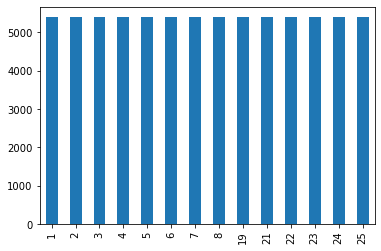

In [51]:
combined_df['participant_id'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

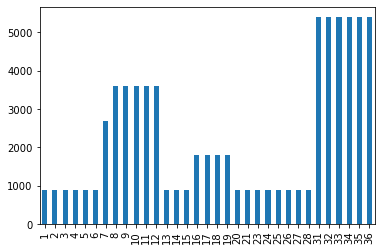

In [52]:
combined_df['clothes_id'].value_counts().sort_index().plot.bar()

In [53]:
combined_df.shape

(75588, 190)

In [55]:
path = "/Users/niharawarawita/Desktop/MSc Project/Data and code/complete_dataset_"+str(dat_num_subwindows)+"subwindows_"+str(dat_num_slices)+"slices.csv"
print(path)

/Users/niharawarawita/Desktop/MSc Project/Data and code/complete_dataset_15subwindows_10slices.csv


In [56]:
# Save the created dataset
combined_df.to_csv(path, index = None)



In [57]:
combo_df = pd.read_csv(path)
combo_df.head()



,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,slice_num,max_ch1_hand0,max_ch2_hand0,max_ch3_hand0,max_ch4_hand0,max_ch5_hand0,max_ch6_hand0,max_ch7_hand0,max_ch8_hand0,mean_ch1_hand0,mean_ch2_hand0,mean_ch3_hand0,mean_ch4_hand0,mean_ch5_hand0,mean_ch6_hand0,mean_ch7_hand0,mean_ch8_hand0,std_ch1_hand0,std_ch2_hand0,std_ch3_hand0,std_ch4_hand0,std_ch5_hand0,std_ch6_hand0,std_ch7_hand0,std_ch8_hand0,max_ch1_hand1,max_ch2_hand1,max_ch3_hand1,max_ch4_hand1,max_ch5_hand1,max_ch6_hand1,max_ch7_hand1,max_ch8_hand1,mean_ch1_hand1,mean_ch2_hand1,mean_ch3_hand1,mean_ch4_hand1,mean_ch5_hand1,mean_ch6_hand1,mean_ch7_hand1,mean_ch8_hand1,std_ch1_hand1,std_ch2_hand1,std_ch3_hand1,std_ch4_hand1,std_ch5_hand1,std_ch6_hand1,std_ch7_hand1,std_ch8_hand1,max_Ax_hand0,max_Ay_hand0,max_Az_hand0,max_Vx_hand0,max_Vy_hand0,max_Vz_hand0,max_Jx_hand0,max_Jy_hand0,max_Jz_hand0,mean_Ax_hand0,mean_Ay_hand0,mean_Az_hand0,mean_Vx_hand0,mean_Vy_hand0,mean_Vz_hand0,mean_Jx_hand0,mean_Jy_hand0,mean_Jz_hand0,std_Ax_hand0,std_Ay_hand0,std_Az_hand0,std_Vx_hand0,std_Vy_hand0,std_Vz_hand0,std_Jx_hand0,std_Jy_hand0,std_Jz_hand0,max_Ax_hand1,max_Ay_hand1,max_Az_hand1,max_Vx_hand1,max_Vy_hand1,max_Vz_hand1,max_Jx_hand1,max_Jy_hand1,max_Jz_hand1,mean_Ax_hand1,mean_Ay_hand1,mean_Az_hand1,mean_Vx_hand1,mean_Vy_hand1,mean_Vz_hand1,mean_Jx_hand1,mean_Jy_hand1,mean_Jz_hand1,std_Ax_hand1,std_Ay_hand1,std_Az_hand1,std_Vx_hand1,std_Vy_hand1,std_Vz_hand1,std_Jx_hand1,std_Jy_hand1,std_Jz_hand1,max_w_hand0,max_x_hand0,max_y_hand0,max_z_hand0,max_AVx_hand0,max_AVy_hand0,max_AVz_hand0,max_AAx_hand0,max_AAy_hand0,max_AAz_hand0,max_AJx_hand0,max_AJy_hand0,max_AJz_hand0,mean_w_hand0,mean_x_hand0,mean_y_hand0,mean_z_hand0,mean_AVx_hand0,mean_AVy_hand0,mean_AVz_hand0,mean_AAx_hand0,mean_AAy_hand0,mean_AAz_hand0,mean_AJx_hand0,mean_AJy_hand0,mean_AJz_hand0,std_w_hand0,std_x_hand0,std_y_hand0,std_z_hand0,std_AVx_hand0,std_AVy_hand0,std_AVz_hand0,std_AAx_hand0,std_AAy_hand0,std_AAz_hand0,std_AJx_hand0,std_AJy_hand0,std_AJz_hand0,max_w_hand1,max_x_hand1,max_y_hand1,max_z_hand1,max_AVx_hand1,max_AVy_hand1,max_AVz_hand1,max_AAx_hand1,max_AAy_hand1,max_AAz_hand1,max_AJx_hand1,max_AJy_hand1,max_AJz_hand1,mean_w_hand1,mean_x_hand1,mean_y_hand1,mean_z_hand1,mean_AVx_hand1,mean_AVy_hand1,mean_AVz_hand1,mean_AAx_hand1,mean_AAy_hand1,mean_AAz_hand1,mean_AJx_hand1,mean_AJy_hand1,mean_AJz_hand1,std_w_hand1,std_x_hand1,std_y_hand1,std_z_hand1,std_AVx_hand1,std_AVy_hand1,std_AVz_hand1,std_AAx_hand1,std_AAy_hand1,std_AAz_hand1,std_AJx_hand1,std_AJy_hand1,std_AJz_hand1
0,7,14,0,smoothness,1,3,medium,2,1,1,0.5,0.615385,0.670391,0.495868,0.759036,0.652406,0.75625,0.666667,0.497805,0.613462,0.665764,0.492188,0.718656,0.636197,0.748926,0.660851,0.002324,0.002503,0.003077,0.002455,0.006501,0.004039,0.003061,0.002083,0.508197,0.908451,0.751445,0.730159,0.493878,0.995918,0.648515,0.576037,0.496670,0.846831,0.691595,0.636244,0.491412,0.608674,0.601382,0.558852,0.004198,0.014491,0.015432,0.026432,0.002186,0.218816,0.022186,0.006429,-0.857056,-0.084885,0.479568,0.000208,0.000215,0.000349,0.718061,0.488281,1.206342,-0.863110,-0.091721,0.468826,9.082031e-06,-0.000028,-0.000006,0.036854,0.039343,0.092439,0.006753,0.007619,0.010341,0.000193,0.000245,0.000281,0.488563,0.441082,0.750762,0.986160,0.013489,-0.211105,0.001218,0.000510,0.000937,1.448006,0.708008,2.343750,0.964774,-0.007117,-0.249875,1.117188e-04,0.000070,0.000027,-0.104780,0.096063,0.335256,0.022364,0.013963,0.028878,0.000738,0.000331,0.000943,1.260192,0.571902,1.565671,0.179352,0.484946,0.160615,-0.840857,0.009831,0.012959,0.117029,1.270143,2.238883,19.812834,154.113175,104.818227,1338.775861,0.178765,0.484513,0.160469,-0.841154,-0.016003,-0.027618,-0.081836,0.129868,0.552890,-1.016133,16.779031,-45.915024,210.907738,0.000451,0.000472,0.000210,0.000335,0.016423,0.031903,0.200440,1.160057,1.546528,13.337295,97.220032,155.178181,1114.885458,0.600343,-0.175433,-0.769104,-0.129347,0.140072,

In [58]:
combo_df.clothes_id.unique()

array([14, 15, 16, 17, 18, 19, 23, 24, 25, 26, 27, 28,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6, 20, 21, 13, 33, 34, 35, 32, 36, 31])

In [59]:
combo_df.shape

(75588, 190)